# ***Climate Change Impacts on Wheat Yield: A Data Science Approach***

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [19]:
# Load crop dataset
df_crop = pd.read_csv("Crops_AllData_Normalized.csv", encoding='ISO-8859-1')

# Display basic info
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513868 entries, 0 to 2513867
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 211.0+ MB


In [20]:
df_crop.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [21]:
df_climate = pd.read_csv("GlobalLandTemperaturesByCity.csv", encoding='ISO-8859-1')

df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [22]:
df_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã rhus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Ã rhus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Ã rhus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Ã rhus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Ã rhus,Denmark,57.05N,10.33E


In [23]:
# Extract year
df_climate['Year'] = pd.to_datetime(df_climate['dt']).dt.year

# Remove missing values
df_climate = df_climate.dropna(subset=['AverageTemperature'])

# Group by country and year
df_temp_avg = df_climate.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

df_temp_avg.head()

,Country,Year,AverageTemperature
0,Afghanistan,1833,13.091150
1,Afghanistan,1834,13.093600
2,Afghanistan,1835,13.959233
3,Afghanistan,1837,13.914846
4,Afghanistan,1838,14.251397


In [24]:
# Now filter for Wheat Yield
df_crop_filtered = df_crop[(df_crop['Item'] == 'Wheat') & (df_crop['Element'] == 'Yield')]

# Rename columns
df_crop_filtered = df_crop_filtered[['Area', 'Year', 'Value']]
df_crop_filtered.columns = ['Country', 'Year', 'Wheat_Yield']

# Preview
df_crop_filtered.head()

,Country,Year,Wheat_Yield
5909,Afghanistan,1961,10220.0
5910,Afghanistan,1962,9735.0
5911,Afghanistan,1963,8317.0
5912,Afghanistan,1964,9510.0
5913,Afghanistan,1965,9723.0


In [25]:
# Merge average temperature with crop yield
df_merged = pd.merge(df_crop_filtered, df_temp_avg, on=['Country', 'Year'])

df_merged = df_merged.rename(columns={'AverageTemperature': 'Avg_Temp'})

df_merged.head()

,Country,Year,Wheat_Yield,Avg_Temp
0,Afghanistan,1961,10220.0,13.817219
1,Afghanistan,1962,9735.0,13.615156
2,Afghanistan,1963,8317.0,14.695344
3,Afghanistan,1964,9510.0,13.062479
4,Afghanistan,1965,9723.0,13.683583


#Linear Regression Model

In [26]:
df_merged.head()

,Country,Year,Wheat_Yield,Avg_Temp
0,Afghanistan,1961,10220.0,13.817219
1,Afghanistan,1962,9735.0,13.615156
2,Afghanistan,1963,8317.0,14.695344
3,Afghanistan,1964,9510.0,13.062479
4,Afghanistan,1965,9723.0,13.683583


In [27]:
X = df_merged[['Avg_Temp']]  # Features
y = df_merged['Wheat_Yield']  # Target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 281881865.6712288
R² Score: 0.13213061450154362


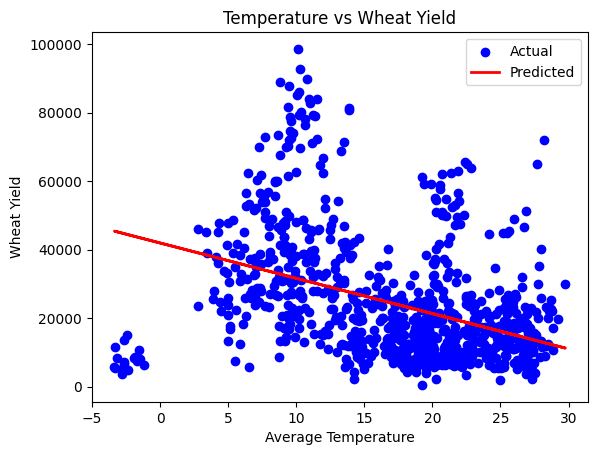

In [36]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Temperature')
plt.ylabel('Wheat Yield')
plt.title('Temperature vs Wheat Yield')
plt.legend()
plt.show()

#Polynomial Regression Model(Deg 2)

In [38]:
X = df_merged[['Avg_Temp']]  # Feature
y = df_merged['Wheat_Yield']  # Target

In [39]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 279208214.44
R² Score: 0.1404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


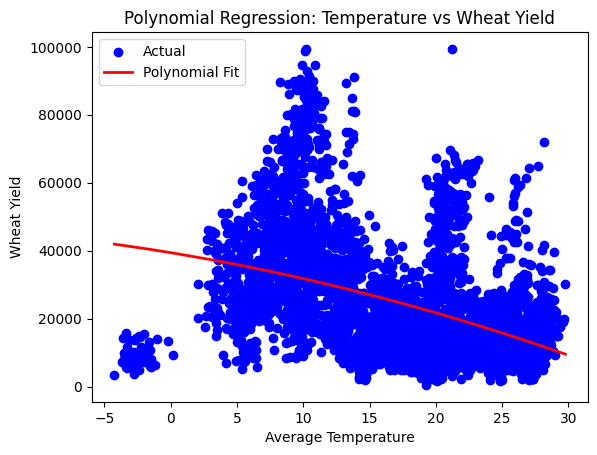

In [44]:
# Sort values for smooth curve

X_sorted = np.sort(X.values, axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_poly_pred = model.predict(X_poly_sorted)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel('Average Temperature')
plt.ylabel('Wheat Yield')
plt.title('Polynomial Regression: Temperature vs Wheat Yield')
plt.legend()
plt.show()

#4th-Degree Polynomial Regression

In [45]:
X = df_merged[['Avg_Temp']]   # Feature
y = df_merged['Wheat_Yield']  # Target

In [46]:
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_poly4, y, test_size=0.2, random_state=42)

In [48]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model4.predict(X_test)

mse4 = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)

print(f"4th Degree Polynomial MSE: {mse4:.2f}")
print(f"4th Degree Polynomial R²: {r2_4:.4f}")

4th Degree Polynomial MSE: 239692625.68
4th Degree Polynomial R²: 0.2620


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


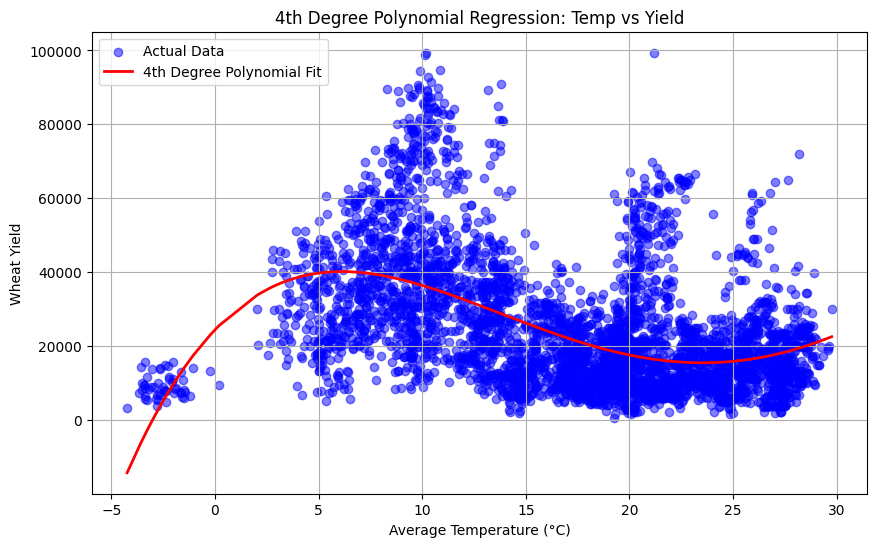

In [50]:
# Sort for smooth curve
X_sorted = np.sort(X.values, axis=0)
X_poly_sorted = poly4.transform(X_sorted)
y_sorted_pred = model4.predict(X_poly_sorted)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5)
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='4th Degree Polynomial Fit')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Wheat Yield')
plt.title('4th Degree Polynomial Regression: Temp vs Yield')
plt.legend()
plt.grid(True)
plt.show()

#Adding more Features

In [51]:
df_merged.columns

Index(['Country', 'Year', 'Wheat_Yield', 'Avg_Temp'], dtype='object')

In [52]:
features = ['Avg_Temp', 'Year']

# Drop rows with missing values in selected columns
df_model = df_merged.dropna(subset=features + ['Wheat_Yield'])

# Define feature matrix (X) and target (y)
X = df_model[features]
y = df_model['Wheat_Yield']

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)  # degree=2 for now, can try 3 or 4 later
X_poly = poly.fit_transform(X)

# Optional: See the new feature names
poly.get_feature_names_out(features)


array(['Avg_Temp', 'Year', 'Avg_Temp^2', 'Avg_Temp Year', 'Year^2',
       'Avg_Temp^3', 'Avg_Temp^2 Year', 'Avg_Temp Year^2', 'Year^3',
       'Avg_Temp^4', 'Avg_Temp^3 Year', 'Avg_Temp^2 Year^2',
       'Avg_Temp Year^3', 'Year^4'], dtype=object)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 211966480.38
R² Score: 0.3474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


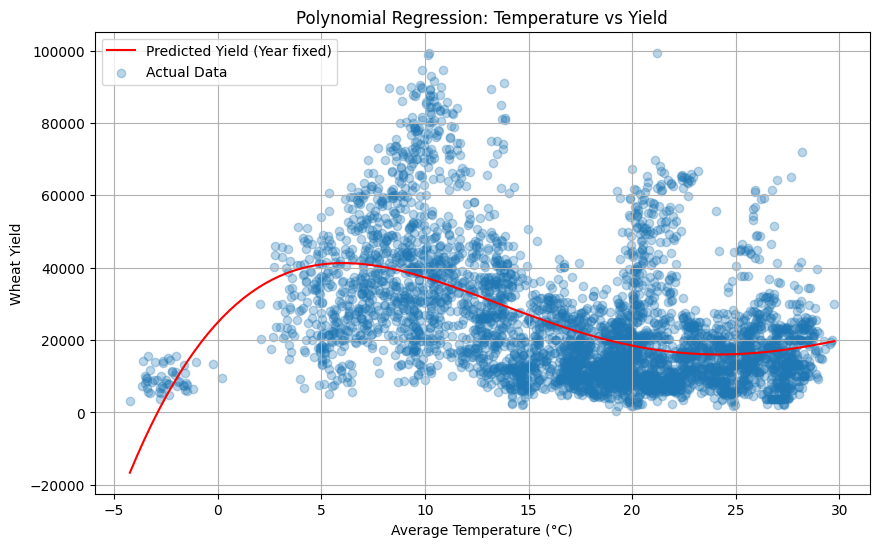

In [57]:
# For visualization, fix Year at median
median_year = int(X['Year'].median())
temp_range = np.linspace(X['Avg_Temp'].min(), X['Avg_Temp'].max(), 100)
temp_year_array = np.column_stack((temp_range, np.full_like(temp_range, median_year)))

temp_year_poly = poly.transform(temp_year_array)
yield_pred = model.predict(temp_year_poly)

plt.figure(figsize=(10,6))
plt.plot(temp_range, yield_pred, color='red', label='Predicted Yield (Year fixed)')
plt.scatter(X['Avg_Temp'], y, alpha=0.3, label='Actual Data')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Wheat Yield')
plt.title('Polynomial Regression: Temperature vs Yield')
plt.legend()
plt.grid(True)
plt.show()

#Filtering & preparing data for India and Canada

In [60]:
# Filter for India and USA, and drop missing values
df_filtered = df_merged[df_merged['Country'].isin(['India', 'Canada'])]
df_filtered = df_filtered.dropna(subset=['Avg_Temp', 'Year', 'Wheat_Yield'])

In [61]:
df_india = df_filtered[df_filtered['Country'] == 'India']
df_can = df_filtered[df_filtered['Country'] == 'Canada']

In [62]:
def train_poly_model(df, country_name):
    # Prepare data
    X = df[['Avg_Temp', 'Year']]
    y = df['Wheat_Yield']

    # Polynomial transform
    poly = PolynomialFeatures(degree=4, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📍 Results for {country_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.4f}")

    return model, poly, X_test, y_test, y_pred


In [63]:
india_model, india_poly, X_india_test, y_india_test, y_india_pred = train_poly_model(df_india, 'India')
can_model, can_poly, X_can_test, y_can_test, y_can_pred = train_poly_model(df_can, 'Canada')


📍 Results for India
Mean Squared Error: 1734598.92
R² Score: 0.9743

📍 Results for Canada
Mean Squared Error: 6540781.40
R² Score: 0.7567


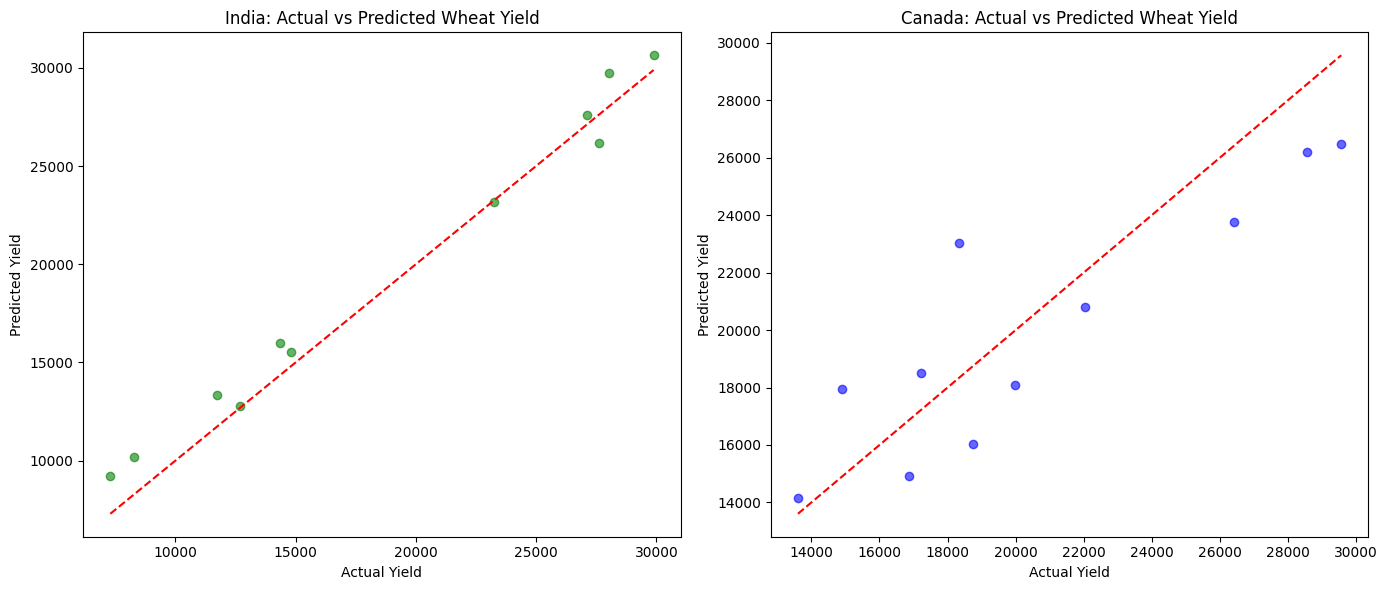

In [64]:

plt.figure(figsize=(14, 6))

# India
plt.subplot(1, 2, 1)
plt.scatter(y_india_test, y_india_pred, alpha=0.6, color='green')
plt.plot([y_india_test.min(), y_india_test.max()], [y_india_test.min(), y_india_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("India: Actual vs Predicted Wheat Yield")

# Canada
plt.subplot(1, 2, 2)
plt.scatter(y_can_test, y_can_pred, alpha=0.6, color='blue')
plt.plot([y_can_test.min(), y_can_test.max()], [y_can_test.min(), y_can_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Canada: Actual vs Predicted Wheat Yield")

plt.tight_layout()
plt.show()


#Building a 3D surface plot of Temp-Year-Yield for each country


In [68]:
def plot_3d_surface(df, model, poly, country_name):
    # Prepare grid of values
    temp_range = np.linspace(df['Avg_Temp'].min(), df['Avg_Temp'].max(), 50)
    year_range = np.linspace(df['Year'].min(), df['Year'].max(), 50)

    temp_grid, year_grid = np.meshgrid(temp_range, year_range)

    # Flatten and prepare for prediction
    grid_points = np.column_stack((temp_grid.ravel(), year_grid.ravel()))
    grid_poly = poly.transform(grid_points)
    yield_pred = model.predict(grid_poly).reshape(temp_grid.shape)

    # Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(temp_grid, year_grid, yield_pred, cmap='viridis', alpha=0.9)

    # Actual data points for comparison
    ax.scatter(df['Avg_Temp'], df['Year'], df['Wheat_Yield'], color='red', s=15, label='Actual Data')

    ax.set_xlabel('Average Temperature (°C)')
    ax.set_ylabel('Year')
    ax.set_zlabel('Wheat Yield')
    ax.set_title(f'3D Surface Plot: {country_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


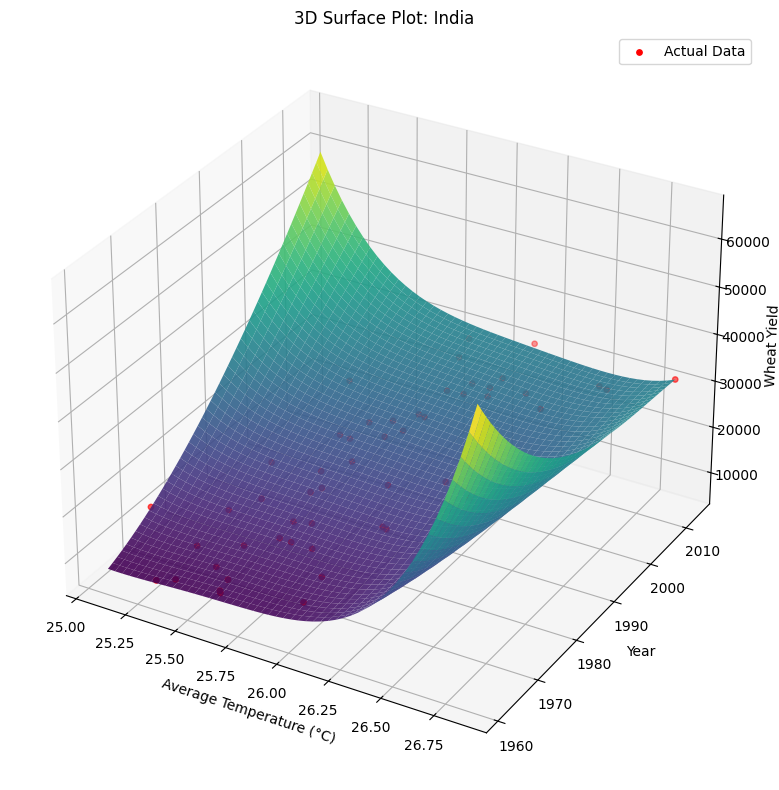

In [69]:
# Plot for India
plot_3d_surface(df_india, india_model, india_poly, 'India')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


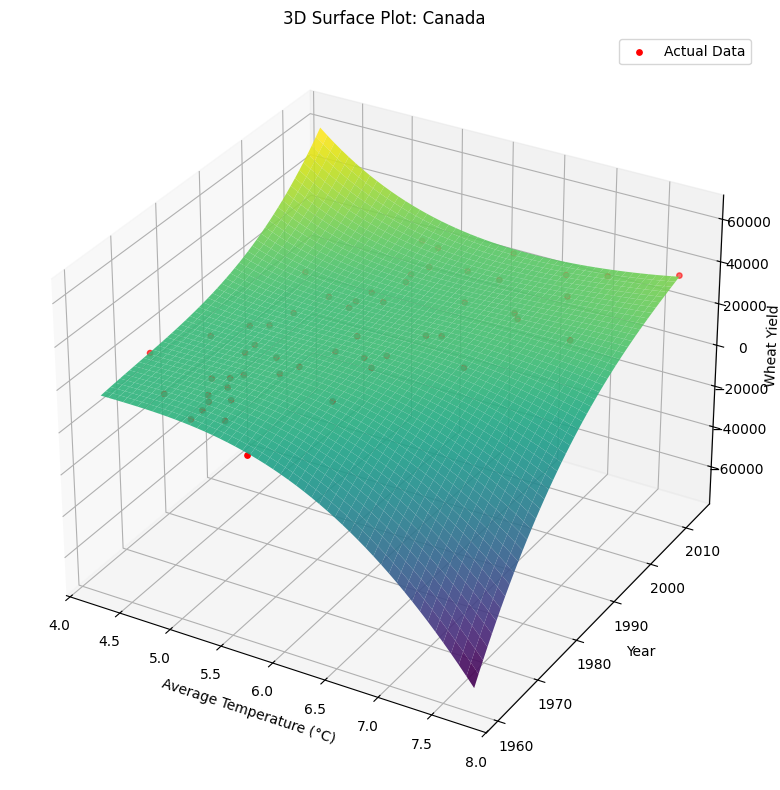

In [71]:
# Plot for Canada
plot_3d_surface(df_can, can_model, can_poly, 'Canada')